## Общие методы для обработки данных
В данном разделе будут находится общие методы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# читаем данные и создаём таблицу
def data_loader(path: str):
    return pd.read_csv(path)

# преобразуем данные так, как нам необходимо
def data_type_and_date_transform(data: pd.DataFrame) ->pd.DataFrame:
    data = data.replace(",", "", regex=True)
    data.Date = pd.to_datetime((data.Date - 25200) * 1e9 ) # Почему-то данные смещены на 7 часов относительно торгов(возможно, и не на 7, но при данном смещении одна торговая сессия укладывается в дневные промежутки)
    data = data.sort_values(by=["Date"])
    data.set_index('Date')
    data.Close = data.Close.astype(float)
    data.High = data.High.astype(float)
    data.Low = data.Low.astype(float)
    data.Open = data.Open.astype(float)
    return data

# Обрезает данные по дате. 
# Важно, чтобы даты в датафрейме были в том же формате что и начальная и конечная дата
def cut_by_date(data: pd.DataFrame, begin_date: str, end_date: str) -> pd.DataFrame:
     result = data[(data['Date'] > begin_date) & (data['Date'] < end_date)]
     result.index = data.index[:len(result)]
     return result

In [2]:
# Считываем данные
general_data = data_loader("raw-SANDP-500.txt")
general_data['Date'] = general_data['Date'].astype(str)
general_data['Time'] = general_data['Time'].astype(str)
general_data['Date'] = pd.to_datetime(general_data['Date'], format='%Y%m%d')
general_data['Time'] = pd.to_datetime(general_data['Time'], unit='s')
general_data['Date'] = general_data['Date'] + pd.to_timedelta(general_data['Time'].dt.strftime('%H:%M:%S'))

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_32536\730861579.py:6: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  general_data['Time'] = pd.to_datetime(general_data['Time'], unit='s')


In [3]:
general_data = general_data.sort_values(by=["Date"])
if "Price" in general_data.columns: 
    general_data.rename(columns={"Price": "Close"}, inplace = True)
general_data.High = general_data.High
general_data.Low = general_data.Low
general_data.Open = general_data.Open
if "Vol" in general_data.columns: 
    ata = general_data.drop("Vol", axis = 1)
if "Time" in general_data.columns:
    general_data = general_data.drop("Time", axis = 1)

In [4]:
general_data.head(20)

,Ticker,Per,Date,Open,High,Low,Close,Vol
0,SANDP-500,1,2010-01-01 00:01:40,1114.81,1114.97,1114.81,1114.97,0
1,SANDP-500,1,2010-01-01 00:03:20,1115.02,1115.10,1115.02,1115.10,0
2,SANDP-500,1,2010-01-01 00:05:00,1115.11,1115.12,1115.11,1115.12,0
3,SANDP-500,1,2010-01-01 00:06:40,1115.13,1115.14,1115.13,1115.14,0
4,SANDP-500,1,2010-01-01 00:08:20,1115.10,1115.10,1115.10,1115.10,0
5,SANDP-500,1,2010-01-04 00:06:40,1122.87,1123.80,1122.87,1123.80,0
6,SANDP-500,1,2010-01-04 00:08:20,1123.95,1124.18,1123.95,1124.18,0
7,SANDP-500,1,2010-01-04 00:10:00,1124.27,1124.27,1124.07,1124.07,0
8,SANDP-500,1,2010-01-04 00:11:40,1124.17,1124.26,1124.17,1124.26,0
9,SANDP-500,1,2010-01-04 00:13:20,1124.63,1124.63,1124.63,1124.63,0


In [5]:
# Производим обрезку данных 
special_data = cut_by_date(general_data, "2010-01-01", "2014-01-01")

In [6]:
# Проверяем получилось ли сделать обрезку
special_data

,Ticker,Per,Date,Open,High,Low,Close,Vol
0,SANDP-500,1,2010-01-01 00:01:40,1114.81,1114.97,1114.81,1114.97,0
1,SANDP-500,1,2010-01-01 00:03:20,1115.02,1115.10,1115.02,1115.10,0
2,SANDP-500,1,2010-01-01 00:05:00,1115.11,1115.12,1115.11,1115.12,0
3,SANDP-500,1,2010-01-01 00:06:40,1115.13,1115.14,1115.13,1115.14,0
4,SANDP-500,1,2010-01-01 00:08:20,1115.10,1115.10,1115.10,1115.10,0
...,...,...,...,...,...,...,...,...
392884,SANDP-500,1,2013-12-31 17:25:00,1843.52,1843.54,1843.52,1843.52,0
392885,SANDP-500,1,2013-12-31 17:26:40,1843.52,1843.52,1843.41,1843.41,0
392886,SANDP-500,1,2013-12-31 17:28:20,1843.38,1843.38,1843.21,1843.21,0
392887,SANDP-500,1,2013-12-31 17:30:00,1843.20,1843.20,1843.15,1843.15,0


In [7]:
special_data['new_index'] = special_data.Close
special_data['new_date'] = special_data.Close
special_data.head()

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_32536\85445124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['new_index'] = special_data.Close
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_32536\85445124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['new_date'] = special_data.Close


,Ticker,Per,Date,Open,High,Low,Close,Vol,new_index,new_date
0,SANDP-500,1,2010-01-01 00:01:40,1114.81,1114.97,1114.81,1114.97,0,1114.97,1114.97
1,SANDP-500,1,2010-01-01 00:03:20,1115.02,1115.10,1115.02,1115.10,0,1115.10,1115.10
2,SANDP-500,1,2010-01-01 00:05:00,1115.11,1115.12,1115.11,1115.12,0,1115.12,1115.12
3,SANDP-500,1,2010-01-01 00:06:40,1115.13,1115.14,1115.13,1115.14,0,1115.14,1115.14
4,SANDP-500,1,2010-01-01 00:08:20,1115.10,1115.10,1115.10,1115.10,0,1115.10,1115.10


In [8]:
import datetime
import calendar
import time
# Получаем значения нчального дня(в тестовом варианте это значение получается равным 1262563200)
special_data.loc[0, 'new_index'] = calendar.timegm(time.strptime(str(special_data['Date'][0]), '%Y-%m-%d %H:%M:%S'))
special_data.loc[0, 'new_date'] = pd.to_datetime(special_data['new_index'][0] * 1e9)

for i in range(1, len(special_data['new_index'])):
    special_data.loc[i, 'new_index'] = special_data['new_index'][i - 1] + 60
    special_data.loc[i, 'new_date'] = pd.to_datetime(special_data['new_index'][i] * 1e9)

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_32536\1389962915.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2010-01-01 00:01:40' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  special_data.loc[0, 'new_date'] = pd.to_datetime(special_data['new_index'][0] * 1e9)


In [9]:
def get_data_by_date(df, target_date: str):
    target_date = pd.to_datetime(target_date)
    # Фильтрация записей
    filtered_df = df[df['Date'].dt.date == target_date.date()]
    return filtered_df

def show_plot_number_of_data_per_date(df):
    # Создание гистограммы
    filtered_df = df['Date'].dt.date
    histogram_data = filtered_df.value_counts().sort_index()

    # Построение гистограммы
    plt.bar(histogram_data.index, histogram_data.values)
    plt.xlabel('Дата')
    plt.ylabel('Количество записей')
    plt.title('Гистограмма количества записей по дням')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

def get_max_data_size(df):
    # Создание гистограммы
    filtered_df = df['Date'].dt.date
    histogram_data = filtered_df.value_counts().sort_index()

    # Получение максимального значения
    max_count = histogram_data.max()
    return max_count

In [10]:
target_date_str = "2010-01-04"

In [11]:
# Преобразование даты для фильтрации к типу datetime
target_date = pd.to_datetime(target_date_str)

In [12]:

# Фильтрация записей
filtered_df = special_data[special_data['Date'].dt.date == target_date.date()]

In [13]:
len(filtered_df)

382

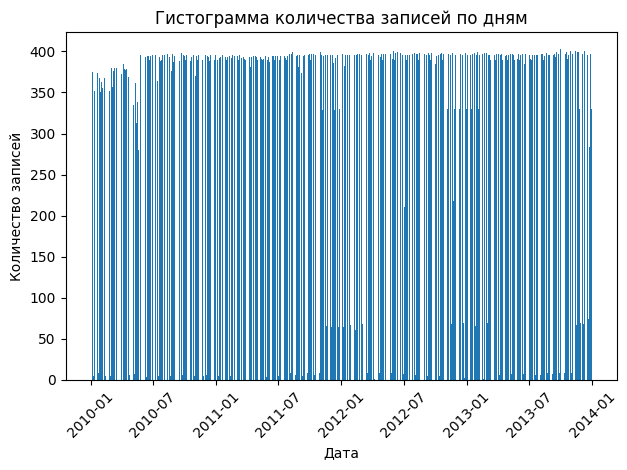

In [14]:
show_plot_number_of_data_per_date(special_data)

In [15]:
special_data.head()

,Ticker,Per,Date,Open,High,Low,Close,Vol,new_index,new_date
0,SANDP-500,1,2010-01-01 00:01:40,1114.81,1114.97,1114.81,1114.97,0,1.262304e+09,2010-01-01 00:01:40
1,SANDP-500,1,2010-01-01 00:03:20,1115.02,1115.10,1115.02,1115.10,0,1.262304e+09,2010-01-01 00:02:40
2,SANDP-500,1,2010-01-01 00:05:00,1115.11,1115.12,1115.11,1115.12,0,1.262304e+09,2010-01-01 00:03:40
3,SANDP-500,1,2010-01-01 00:06:40,1115.13,1115.14,1115.13,1115.14,0,1.262304e+09,2010-01-01 00:04:40
4,SANDP-500,1,2010-01-01 00:08:20,1115.10,1115.10,1115.10,1115.10,0,1.262304e+09,2010-01-01 00:05:40


In [16]:
# Получение часов из даты
special_data['hour']  = special_data['Date'].dt.hour

# Группировка по часам и выбор последней минуты в каждой группе
result = special_data.groupby('hour').apply(lambda x: x[x['Date'] == x['Date'].max()])

# Удаление временной колонки
result.drop(columns = ['hour'], inplace = True)
special_data.drop(columns = ['hour'], inplace = True)
print(result)

                Ticker  Per                Date     Open     High      Low  \
hour                                                                         
0    392528  SANDP-500    1 2013-12-31 00:58:20  1840.44  1840.45  1840.42   
1    392552  SANDP-500    1 2013-12-31 01:38:20  1840.55  1840.65  1840.55   
2    392564  SANDP-500    1 2013-12-31 02:58:20  1844.11  1844.11  1843.95   
3    392588  SANDP-500    1 2013-12-31 03:38:20  1843.86  1843.97  1843.86   
4    392596  SANDP-500    1 2013-12-31 04:58:20  1845.21  1845.21  1845.12   
5    392632  SANDP-500    1 2013-12-31 05:58:20  1845.64  1845.64  1845.45   
6    392648  SANDP-500    1 2013-12-31 06:25:00  1845.58  1845.64  1845.58   
7    392664  SANDP-500    1 2013-12-31 07:58:20  1848.56  1848.57  1848.38   
8    392700  SANDP-500    1 2013-12-31 08:58:20  1847.14  1847.14  1847.04   
9    392708  SANDP-500    1 2013-12-31 09:11:40  1846.89  1846.89  1846.81   
10   392732  SANDP-500    1 2013-12-31 10:58:20  1846.37  1846.3

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_32536\2758553144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['hour']  = special_data['Date'].dt.hour
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_32536\2758553144.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data.drop(columns = ['hour'], inplace = True)


In [17]:
# Функция для фильтрации последней минуты в часе
def filter_last_minute_in_hour(group):
    return group[group['Date'] == group['Date'].max()]

def minute_to_hours_transfer(df):
    df.set_index('Date', inplace = True)
    return df.groupby(pd.Grouper(freq='H')).last()

def minute_to_day_transfer(df):
    return df.groupby(df['Date'].dt.date).apply(lambda x: x.nlargest(1, columns='Date'))

# Вычисление последней минуты последнего дня в неделе
def last_minute_of_last_weekday(group):
    return group[group.dt.weekday == group.dt.weekday.max()].tail(1)

def minute_to_weeks_transfer(df):
    df.set_index('Date', inplace = True)
    return df.groupby(df.index.to_period('W')).last()

def minute_to_month_transfer(df):
    df.set_index('Date', inplace = True)
    return df.groupby(df.index.to_period('M')).last()

In [18]:
columns_to_drop = ['new_index', 'new_date']

# Проверка на существование каждой колонки перед удалением
for column in columns_to_drop:
    if column in special_data.columns:
        special_data = special_data.drop(columns=[column])

In [19]:
a = special_data.copy(deep = True)
b = special_data.copy(deep = True)
c = special_data.copy(deep = True)
z = special_data.copy(deep = True)

In [20]:
d = minute_to_hours_transfer(a)
e = minute_to_day_transfer(b)
e = e.droplevel(level=1)
f = minute_to_weeks_transfer(c)
g = minute_to_month_transfer(z)
f.reset_index(inplace = True)
f['Period_start'] = f['Date'].astype('datetime64[ns]')
f['Period_end'] = f['Period_start'] + pd.DateOffset(days = 6)
f.set_index('Period_end', inplace = True)
g['LastDayOfMonth'] = g.index.to_timestamp('M').to_period('D').end_time
g.reset_index(inplace = True)
g.set_index('LastDayOfMonth', inplace = True)

In [21]:
f

,Date,Ticker,Per,Open,High,Low,Close,Vol,Period_start
Period_end,,,,,,,,,
2010-01-03,2009-12-28/2010-01-03,SANDP-500,1,1115.10,1115.10,1115.10,1115.10,0,2009-12-28
2010-01-10,2010-01-04/2010-01-10,SANDP-500,1,1144.99,1144.99,1144.98,1144.98,0,2010-01-04
2010-01-17,2010-01-11/2010-01-17,SANDP-500,1,1136.03,1136.03,1136.03,1136.03,0,2010-01-11
2010-01-24,2010-01-18/2010-01-24,SANDP-500,1,1091.76,1091.76,1091.76,1091.76,0,2010-01-18
2010-01-31,2010-01-25/2010-01-31,SANDP-500,1,1073.72,1073.82,1073.72,1073.82,0,2010-01-25
...,...,...,...,...,...,...,...,...,...
2013-12-08,2013-12-02/2013-12-08,SANDP-500,1,1805.09,1805.09,1805.09,1805.09,0,2013-12-02
2013-12-15,2013-12-09/2013-12-15,SANDP-500,1,1775.32,1775.32,1775.32,1775.32,0,2013-12-09
2013-12-22,2013-12-16/2013-12-22,SANDP-500,1,1818.32,1818.32,1818.32,1818.32,0,2013-12-16


In [22]:
g

,Date,Ticker,Per,Open,High,Low,Close,Vol
LastDayOfMonth,,,,,,,,
2010-01-31 23:59:59.999999999,2010-01,SANDP-500,1,1073.72,1073.82,1073.72,1073.82,0
2010-02-28 23:59:59.999999999,2010-02,SANDP-500,1,1104.48,1104.48,1104.48,1104.48,0
2010-03-31 23:59:59.999999999,2010-03,SANDP-500,1,1169.37,1169.37,1169.37,1169.37,0
2010-04-30 23:59:59.999999999,2010-04,SANDP-500,1,1188.06,1188.06,1188.06,1188.06,0
2010-05-31 23:59:59.999999999,2010-05,SANDP-500,1,1089.41,1089.41,1089.41,1089.41,0
2010-06-30 23:59:59.999999999,2010-06,SANDP-500,1,1031.03,1031.08,1031.03,1031.08,0
2010-07-31 23:59:59.999999999,2010-07,SANDP-500,1,1101.60,1101.60,1101.59,1101.60,0
2010-08-31 23:59:59.999999999,2010-08,SANDP-500,1,1048.86,1048.86,1048.46,1048.46,0
2010-09-30 23:59:59.999999999,2010-09,SANDP-500,1,1142.50,1142.50,1142.10,1142.10,0


In [23]:
a.head(40)

,Ticker,Per,Open,High,Low,Close,Vol
Date,,,,,,,
2010-01-01 00:01:40,SANDP-500,1,1114.81,1114.97,1114.81,1114.97,0
2010-01-01 00:03:20,SANDP-500,1,1115.02,1115.10,1115.02,1115.10,0
2010-01-01 00:05:00,SANDP-500,1,1115.11,1115.12,1115.11,1115.12,0
2010-01-01 00:06:40,SANDP-500,1,1115.13,1115.14,1115.13,1115.14,0
2010-01-01 00:08:20,SANDP-500,1,1115.10,1115.10,1115.10,1115.10,0
2010-01-04 00:06:40,SANDP-500,1,1122.87,1123.80,1122.87,1123.80,0
2010-01-04 00:08:20,SANDP-500,1,1123.95,1124.18,1123.95,1124.18,0
2010-01-04 00:10:00,SANDP-500,1,1124.27,1124.27,1124.07,1124.07,0
2010-01-04 00:11:40,SANDP-500,1,1124.17,1124.26,1124.17,1124.26,0


In [24]:
d

,Ticker,Per,Open,High,Low,Close,Vol
Date,,,,,,,
2010-01-01 00:00:00,SANDP-500,1.0,1115.10,1115.10,1115.10,1115.10,0.0
2010-01-01 01:00:00,None,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,None,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 03:00:00,None,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 04:00:00,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2013-12-31 13:00:00,SANDP-500,1.0,1846.46,1846.49,1846.46,1846.48,0.0
2013-12-31 14:00:00,SANDP-500,1.0,1846.38,1846.38,1846.25,1846.25,0.0
2013-12-31 15:00:00,SANDP-500,1.0,1846.38,1846.38,1846.36,1846.36,0.0


In [25]:
e.head(10)

,Ticker,Per,Date,Open,High,Low,Close,Vol
Date,,,,,,,,
2010-01-01,SANDP-500,1,2010-01-01 00:08:20,1115.10,1115.10,1115.10,1115.10,0
2010-01-04,SANDP-500,1,2010-01-04 17:31:40,1132.61,1132.80,1132.61,1132.80,0
2010-01-05,SANDP-500,1,2010-01-05 17:31:40,1136.17,1136.31,1136.17,1136.31,0
2010-01-06,SANDP-500,1,2010-01-06 17:31:40,1136.85,1136.85,1136.83,1136.85,0
2010-01-07,SANDP-500,1,2010-01-07 17:31:40,1141.56,1141.65,1141.56,1141.65,0
2010-01-08,SANDP-500,1,2010-01-08 17:31:40,1144.52,1144.72,1144.52,1144.72,0
2010-01-09,SANDP-500,1,2010-01-09 00:06:40,1144.99,1144.99,1144.98,1144.98,0
2010-01-11,SANDP-500,1,2010-01-11 17:31:40,1146.94,1147.05,1146.88,1147.05,0
2010-01-12,SANDP-500,1,2010-01-12 17:31:40,1135.59,1135.82,1135.58,1135.82,0


In [26]:
f

,Date,Ticker,Per,Open,High,Low,Close,Vol,Period_start
Period_end,,,,,,,,,
2010-01-03,2009-12-28/2010-01-03,SANDP-500,1,1115.10,1115.10,1115.10,1115.10,0,2009-12-28
2010-01-10,2010-01-04/2010-01-10,SANDP-500,1,1144.99,1144.99,1144.98,1144.98,0,2010-01-04
2010-01-17,2010-01-11/2010-01-17,SANDP-500,1,1136.03,1136.03,1136.03,1136.03,0,2010-01-11
2010-01-24,2010-01-18/2010-01-24,SANDP-500,1,1091.76,1091.76,1091.76,1091.76,0,2010-01-18
2010-01-31,2010-01-25/2010-01-31,SANDP-500,1,1073.72,1073.82,1073.72,1073.82,0,2010-01-25
...,...,...,...,...,...,...,...,...,...
2013-12-08,2013-12-02/2013-12-08,SANDP-500,1,1805.09,1805.09,1805.09,1805.09,0,2013-12-02
2013-12-15,2013-12-09/2013-12-15,SANDP-500,1,1775.32,1775.32,1775.32,1775.32,0,2013-12-09
2013-12-22,2013-12-16/2013-12-22,SANDP-500,1,1818.32,1818.32,1818.32,1818.32,0,2013-12-16


In [27]:
def divide_by_100(number):
    if number > 10000:
        return number / 100
    else:
        return number

In [34]:
#d.Open = d.Open.apply(divide_by_100)
#d.High = d.High.apply(divide_by_100)
#d.Low = d.Low.apply(divide_by_100)
#d.Close = d.Close.apply(divide_by_100)
d.to_csv("sand500_MinuteToHour.csv")

In [35]:
#e.Open = e.Open.apply(divide_by_100)
#e.High = e.High.apply(divide_by_100)
#e.Low = e.Low.apply(divide_by_100)
#e.Close = e.Close.apply(divide_by_100)
e.to_csv("jpe_MinuteToDay.csv")

In [36]:
#f.Open = f.Open.apply(divide_by_100)
#f.High = f.High.apply(divide_by_100)
#f.Low = f.Low.apply(divide_by_100)
#f.Close = f.Close.apply(divide_by_100)
f.to_csv("jpe_MinuteToWeek.csv")

In [28]:
#g.Open = f.Open.apply(divide_by_100)
#g.High = f.High.apply(divide_by_100)
#g.Low = f.Low.apply(divide_by_100)
#g.Close = f.Close.apply(divide_by_100)
g.to_csv("sand500_MinuteToMonth.csv")

Text(0.5, 1.0, 'S&P 500')

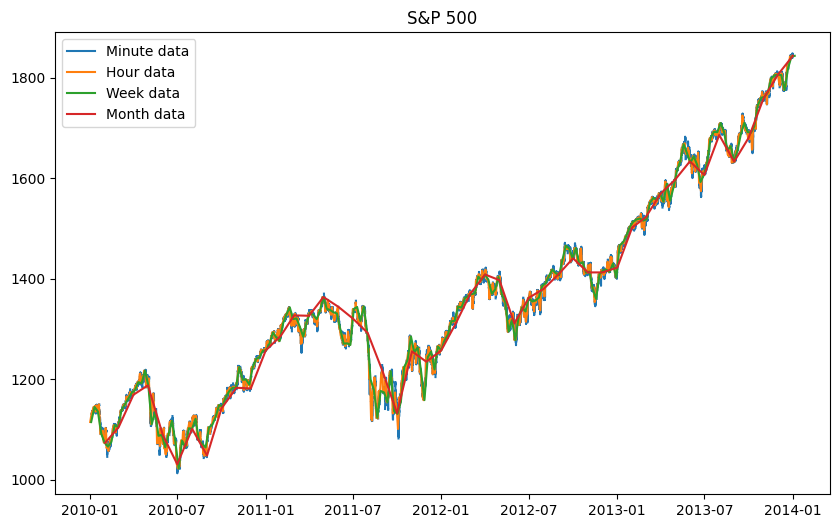

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(d.Close, label = "Minute data")
plt.plot(e.Close, label = "Hour data")
plt.plot(f.Close, label = "Week data")
plt.plot(g.Close, label = "Month data")
plt.legend()
plt.title("S&P 500")